# Project: Wrangling and Analyze Data

# libraries

In [1]:
import pandas as pd
import numpy as np
import requests
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px


## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
##### 1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
tw_archive = pd.read_csv('twitter-archive-enhanced.csv')
tw_archive.head(5)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

##### 2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)


In [4]:
# save the file 
with open("image_predictions.tsv", mode='wb') as file:
    file.write(response.content)

In [7]:
#Import the tweet image predictions TSV file into a DataFrame
img_prediction = pd.read_csv('image_predictions.tsv', sep='\t')
img_prediction.head(5)

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

##### 3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [8]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = tw_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()

# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfiles:
    
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfiles)
            outfiles.write('\n')
        except tweepy.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)



1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256
Fail
6: 891087950875897856
Fail
7: 890971913173991426
Fail
8: 890729181411237888
Fail
9: 890609185150312448
Fail
10: 890240255349198849
Fail
11: 890006608113172480
Fail
12: 889880896479866881
Fail
13: 889665388333682689
Fail
14: 889638837579907072
Fail
15: 889531135344209921
Fail
16: 889278841981685760
Fail
17: 888917238123831296
Fail
18: 888804989199671297
Fail
19: 888554962724278272
Fail
20: 888202515573088257
Fail
21: 888078434458587136
Fail
22: 887705289381826560
Fail
23: 887517139158093824
Fail
24: 887473957103951883
Fail
25: 887343217045368832
Fail
26: 887101392804085760
Fail
27: 886983233522544640
Fail
28: 886736880519319552
Fail
29: 886680336477933568
Fail
30: 886366144734445568
Fail
31: 886267009285017600
Fail
32: 886258384151887873
Fail
33: 886054160059072513
Fail
34: 885984800019947520
Fail
35: 885528943205470208
Fail
36: 885518971528720385
Fail
3

In [9]:
# appending every line in the file tweet_json.txt in the list

tweet_list = []
for line in open ('tweet-json.txt', 'r'):
    tweet_list.append (json.loads(line))

In [11]:
# making the file readable by dumps, then creating the file
with open('tweet_json_new', 'w') as file:
    file.write(json.dumps(tweet_list, indent = 4))

In [16]:
#loading the file 
with open('tweet_json_new', encoding = 'utf-8') as outfile:
    data_file = json.load(outfile)
data_file

[{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
  'id': 892420643555336193,
  'id_str': '892420643555336193',
  'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
  'truncated': False,
  'display_text_range': [0, 85],
  'entities': {'hashtags': [],
   'symbols': [],
   'user_mentions': [],
   'urls': [],
   'media': [{'id': 892420639486877696,
     'id_str': '892420639486877696',
     'indices': [86, 109],
     'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
     'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
     'url': 'https://t.co/MgUWQ76dJU',
     'display_url': 'pic.twitter.com/MgUWQ76dJU',
     'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
     'type': 'photo',
     'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'},
      'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
      'small': {'w': 540, 'h': 528, 'resize': 'fit'},

In [17]:
# Extract the tweet_id, favorite and retweet count

json_tweetlist = []
with open('tweet_json_new', encoding = 'utf-8') as files:
    data = json.load(files)
    for line in data:
        tweet_id = line ['id']
        retweet_count = line ['retweet_count']
        favorite_count = line ['favorite_count']
        followers_count = line ['user']['followers_count']
        
        
         # Assign these values into our list
        json_tweetlist.append({'tweet_id': (tweet_id),
                             'retweet_count': (retweet_count),
                             'favorite_count': (favorite_count),
                            'followers_count': (followers_count),

                            })
        json_file = pd.DataFrame(json_tweetlist, columns = ['tweet_id', 'favorite_count','retweet_count', 
                                                           'followers_count'])



In [19]:
json_file.head()

tweet_id  favorite_count  retweet_count  followers_count
0  892420643555336193           39467           8853          3200889
1  892177421306343426           33819           6514          3200889
2  891815181378084864           25461           4328          3200889
3  891689557279858688           42908           8964          3200889
4  891327558926688256           41048           9774          3200889

In [20]:
json_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   tweet_id         2354 non-null   int64
 1   favorite_count   2354 non-null   int64
 2   retweet_count    2354 non-null   int64
 3   followers_count  2354 non-null   int64
dtypes: int64(4)
memory usage: 73.7 KB


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



# `- tw_archive` 

### - Visual assessment


In [21]:
tw_archive.head(10)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   
5  891087950875897856                    NaN                  NaN   
6  890971913173991426                    NaN                  NaN   
7  890729181411237888                    NaN                  NaN   
8  890609185150312448                    NaN                  NaN   
9  890240255349198849                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   
5  2017-07-29 00:08:17 +0000   
6  2017-07-28 16:27:12 +0000   
7  2017-07-28 00:22:40 +0000   
8  2017-07-27 16:25:51 +0000   
9  2017-07-26 15:59:51 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   
5  <a href="http://twitter.com/download/iphone" r...   
6  <a href="http://twitter.com/download/iphone" r...   
7  <a href="http://twitter.com/download/iphone" r...   
8  <a href="http://twitter.com/download/iphone" r...   
9  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   
5  Here we have a majestic great white breaching ...                  NaN   
6  Meet Jax. He enjoys ice cream so much he gets ...                  NaN   
7  When you watch your owner call another dog a g...                  NaN   
8  This is Zoey. She doesn't want to be one of th...                  NaN   
9  This is Cassie. She is a college pup. Studying...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   
5                       NaN                        NaN   
6                       NaN                        NaN   
7                       NaN                        NaN   
8                       NaN                        NaN   
9                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   
5  https://twitter.com/dog_rates/status/891087950...                13   
6  https://gofundme.com/ydvmve-surgery-for-jax,ht...                13   
7  https://twitter.com/dog_rates/status/890729181...                13   
8  https://twitter.com/dog_rates/status/890609185...                13   
9  https://twitter.com/dog_rates/status/890240255...    

>* Columns: **in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp and name.** Had a missing values. 
>* Incorrect rating of some types of dogs
>* Columns: **doggo, floofer, pupper and puppo.**  Have the same categorical classification, can be Merging in one column
>* unnecessary columns.
>* source culomn have a string between html tages

### - Programmatic assessment

In [22]:
tw_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

>* `tweet_id` incorrect datatype.
>* `timestamp` incorrect datatype.
>* `rating_numerator` & `rating_denominator` shoud be a float.

In [23]:
sum(tw_archive.tweet_id.duplicated())

0

In [25]:
tw_archive.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

>* Abnormal names such as a, the, and an. Maybe was a part of text of the tweet
>* Some of names starting with uppercase and names starting with lowercase.

In [26]:
tw_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

>* some of `rating_numerator` have high values like 1776, 960, 420

In [27]:
tw_archive.rating_denominator.unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2])

>* The denominator  not equal  10 in some of rating

In [32]:
tw_archive.text.sample (10)

1672    Meet Brody. He's a Downton Abbey Falsetto. Add...
2158    This is Linda. She just looked up and saw you ...
444     Some happy pupper news to share. 10/10 for eve...
259     This is Tycho. She just had new wheels install...
1099    This is Maxaroni. He's curly af. Also rather f...
1714    Merry Christmas. My gift to you is this tiny u...
504     This is Bauer. He had nothing to do with the c...
161     Meet Lorenzo. He's an avid nifty hat wearer an...
1492    This pupper just descended from heaven. 12/10 ...
1823        ITSOFLUFFAYYYYY 12/10 https://t.co/bfw13CnuuZ
Name: text, dtype: object

>* Text column had multiple variables, such as text and url

# `- img_prediction`

### - Visual assessment

In [128]:
img_prediction.head (10)

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
5  666050758794694657  https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg   
6  666051853826850816  https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg   
7  666055525042405380  https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg   
8  666057090499244032  https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg   
9  666058600524156928  https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0  1        Welsh_springer_spaniel  0.465074  True    collie               
1  1        redbone                 0.506826  True    miniature_pinscher   
2  1        German_shepherd         0.596461  True    malinois             
3  1        Rhodesian_ridgeback     0.408143  True    redbone              
4  1        miniature_pinscher      0.560311  True    Rottweiler           
5  1        Bernese_mountain_dog    0.651137  True    English_springer     
6  1        box_turtle              0.933012  False   mud_turtle           
7  1        chow                    0.692517  True    Tibetan_mastiff      
8  1        shopping_cart           0.962465  False   shopping_basket      
9  1        miniature_poodle        0.201493  True    komondor             

    p2_conf  p2_dog                           p3   p3_conf  p3_dog  
0  0.156665  True    Shetland_sheepdog            0.061428  True    
1  0.074192  True    Rhodesian_ridgeback          0.072010  True    
2  0.138584  True    bloodhound                   0.116197  True    
3  0.360687  True    miniature_pinscher           0.222752  True    
4  0.243682  True    Doberman                     0.154629  True    
5  0.263788  True    Greater_Swiss_Mountain_dog   0.016199  True    
6  0.045885  False   terrapin                     0.017885  False   
7  0.058279  True    fur_coat                     0.054449  False   
8  0.014594  False   golden_retriever             0.007959  True    
9  0.192305  True    soft-coated_wheaten_terrier  0.082086  True

>* Columns: **p1, p2, and p3.** have names starting with uppercase and names with lowercase letters.
>* Some of prediction not dogs (terrapin, coho and guinea_pig)

### - Programmatic assessment

In [129]:
img_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


>* `tweet_id:` incorrect datatype

In [33]:
sum(img_prediction.tweet_id.duplicated())

0

# `- json_file` 

### - Programmatic assessment

In [34]:
json_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   tweet_id         2354 non-null   int64
 1   favorite_count   2354 non-null   int64
 2   retweet_count    2354 non-null   int64
 3   followers_count  2354 non-null   int64
dtypes: int64(4)
memory usage: 73.7 KB


>* `tweet_id:` incorrect datatype

# Quality issues

| Issue num  | Table  | Type of issue | Asses type | Description |
| :---: | :---: | :---:| :---: | :--: |
| 1 | `Tw_archive`  | Quality | Visual  | Missing values in many of columns like, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp and name. |
| 2 | `Tw_archive ` | Quality | Visual  | Source culomn have a string between html tages |
| 3 | `Tw_archive ` | Quality | Visual  | Unacceptable rating of some types of dogs. |
| 4 | `Tw_archive ` | Quality | Visual  | Unnecessary columns. |
| 5 | `Tw_archive ` | Quality | Programmatic | `tweet_id` incorrect datatype. Convert to object. `timestamp` incorrect datatype. Convert to Date. `rating_numerator` shoud be a float. |
| 6 | `Tw_archive ` | Quality | Programmatic | Abnormal names such as a, the, and an. Maybe was a part of the text of the tweet. And some of names starting with uppercase and names starting with lower. |
| 7 | `Tw_archive ` | Quality | Programmatic | Some of rating_numerator have high values like 1776, 960, 420. and wrong reading of the decimal rating. The denominator not equal 10 in some of rating  |
| 8 | `img_prediction` | Quality | Visual  | Columns: p1, p2, and p3. have names starting with uppercase and names with lowercase. |
| 9 | `img_prediction` | Quality | Visual  | Some of prediction not dogs (terrapin, coho and guinea_pig) |
| 10 | `img_prediction` | Quality | Programmatic | `tweet_id:` incorrect dtype, must convert to object.
| 11 | `json_file` | Quality | Programmatic | dtype in column `tweet_id` shoud be convert to object.


# Tidiness issues
| Issue num  | Table  | Type of issue | Asses type | Description |
| :---: | :---: | :---:| :---: | :--: |
| 1 | `Tw_archive`  | Tidiness | Visual  | Columns: doggo, floofer, pupper and puppo. Have the same categorical classification, shoud be Merging in one column. |
| 2 | `Tw_archive ` | Tidiness | Programmatic  | Text column had multiple variables, such as text and url. |
| 3 | `All ` | Tidiness | Programmatic  | All three tables can be merged for manageability. |

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [36]:
# Make copies of original pieces of data
tw_archive_copy = tw_archive.copy()
img_prediction_copy = img_prediction.copy()
json_file_copy = json_file.copy()


### Issue 1:  Fix Datatype 

#### Define:  
 in **tw_archive table :**  
 >* `tweet_id` covert to object. 
 >* `timestampt` convert to datetime.
 >* `rating_numartor` convert to float.
 >* `rating_denominator` convert to float.
 
 in **img_prediction :**
 >* `tweet_id` convert to object.

in **json_file :**
 >* `tweet_id` convert to object.

#### Code 

In [42]:
# tweet_id convert to object
tw_archive_copy['tweet_id'] = tw_archive_copy['tweet_id'].astype('str')

# timestampt convert to datetime 
tw_archive_copy["timestamp"] = tw_archive_copy["timestamp"].astype('datetime64')

# rating_numartor convert to float 
tw_archive_copy['rating_numerator'] = tw_archive_copy['rating_numerator'].astype('float')

# rating_numartor convert to float 
tw_archive_copy['rating_denominator'] = tw_archive_copy['rating_denominator'].astype('float')



In [39]:
# tweet_id convert to object
img_prediction_copy['tweet_id'] = img_prediction_copy['tweet_id'].astype('str')

In [40]:
# tweet_id convert to object
json_file_copy['tweet_id'] = json_file_copy['tweet_id'].astype('str')

#### Test

In [43]:
# tw_archive table
tw_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2356 non-null   object        
 1   in_reply_to_status_id       78 non-null     float64       
 2   in_reply_to_user_id         78 non-null     float64       
 3   timestamp                   2356 non-null   datetime64[ns]
 4   source                      2356 non-null   object        
 5   text                        2356 non-null   object        
 6   retweeted_status_id         181 non-null    float64       
 7   retweeted_status_user_id    181 non-null    float64       
 8   retweeted_status_timestamp  181 non-null    object        
 9   expanded_urls               2297 non-null   object        
 10  rating_numerator            2356 non-null   float64       
 11  rating_denominator          2356 non-null   float64     

In [44]:
# img_prediction table
img_prediction_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [45]:
# json_file table
json_file_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         2354 non-null   object
 1   favorite_count   2354 non-null   int64 
 2   retweet_count    2354 non-null   int64 
 3   followers_count  2354 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 73.7+ KB


### Issue #2: Fix Names 

#### Define: 
>in **tw_archive table:** Abnormal names such as a, the, and an. Maybe was a part of the text of the tweet. And some of names starting with uppercase and names starting with lowercase.

In [46]:
tw_archive_copy.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [48]:
# will replacing all abnormal names with None values

tw_archive_copy["name"].replace(to_replace=["actually", "officially","unacceptable", "incredibly", 
                                              "a","my" "all", "an", "by", "his", "o", "just", "my", "not", 
                                              "such", "the", "this", "very", "old" ],
           value="None", inplace = True)



#### Test

In [49]:
tw_archive_copy.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot',
       'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Emmy',
       'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja', 'Penny',
       'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget',
       'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra', 'Monkey',
       'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn', 'Boomer',
       'Cody', 'Rumble', 'Clifford', 'quite', 'Dewey', 'Scout', 'Gizmo',
       'Cooper', 'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy',
       'Meatball', 'Paisley', 'Albus', 'Neptune', 'Quinn', 'Bell

#### Define: 
>Convert all names letter to uppercase.

In [50]:
tw_archive_copy.name=tw_archive_copy.name.str.upper()

#### Test

In [51]:
tw_archive_copy.name.head()

0     PHINEAS
1       TILLY
2      ARCHIE
3       DARLA
4    FRANKLIN
Name: name, dtype: object

#### Define:
>in **`img_predection` table:** columns p1, p2, and p3. have names starting with uppercase and names with lowercase letters.

#### Code 

In [54]:
img_prediction_copy.p1.sample(20)

301                          swing
1139               German_shepherd
1036                      espresso
221                     toy_poodle
1857                     Chihuahua
640                 frilled_lizard
1465                      Airedale
718                   sliding_door
1976    Greater_Swiss_Mountain_dog
433                      porcupine
583             Labrador_retriever
520                           chow
848                        basenji
1492                     seat_belt
323                  china_cabinet
65                      toy_poodle
1708                cocker_spaniel
70                      Rottweiler
34        Chesapeake_Bay_retriever
420                     toy_poodle
Name: p1, dtype: object

In [55]:
# Convert all names to lowercase letters
img_prediction_copy.p1=img_prediction_copy.p1.str.lower()
img_prediction_copy.p2=img_prediction_copy.p2.str.lower()
img_prediction_copy.p3=img_prediction_copy.p2.str.lower()
# Replace all space, - with _
img_prediction_copy[['p1','p2','p3']] = img_prediction_copy[['p1','p2','p3']].replace(' ','_').replace('-','_')

#### Test

In [56]:
img_prediction_copy.p1.sample(5)

397     labrador_retriever
215                  snail
138       lakeland_terrier
1518             chihuahua
1980                kelpie
Name: p1, dtype: object

In [57]:
img_prediction_copy.p2.sample(5)

928     chesapeake_bay_retriever
1648          miniature_pinscher
1994     black-and-tan_coonhound
1315                bull_mastiff
1911                    malinois
Name: p2, dtype: object

In [58]:
img_prediction_copy.p3.sample(5)

512             guinea_pig
1050        cocker_spaniel
159                 collie
600              chihuahua
1578    labrador_retriever
Name: p3, dtype: object

### Issue #3: 

#### Define: 
>Source column have a string between html tags
>* will extracting the text by using regex

In [60]:
tw_archive_copy.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [61]:
# Extract the text content from tags
tw_archive_copy.source = tw_archive_copy.source.str.extract(r'>(.*)<', expand=True) 

#### Test:

In [62]:
tw_archive_copy.source.value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

### Issue #4: Fix Rating 

#### Define: 
>Unacceptable rating of some types of dogs.
<br> Some of rating_numerator have high values like 1776, 960, 420.
And wrong reading of the decimal rating
>* We will convert all high ratings values, by using this method: $$new-rating= \frac{rating-numerator*10}{rating-denominator} \\ $$

#### Code 

In [63]:
# this code to query and show all values not equal 10 in rating denominator
new_rating = tw_archive_copy[['text', 'rating_numerator', 'rating_denominator']]
new_rating_den = new_rating.query('rating_denominator != 10.0')

new_rating_den


text  rating_numerator  \
313   @jonnysun @Lin_Manuel ok jomny I know you're e...             960.0   
342            @docmisterio account started on 11/15/15              11.0   
433   The floofs have been released I repeat the flo...              84.0   
516   Meet Sam. She smiles 24/7 &amp; secretly aspir...              24.0   
784   RT @dog_rates: After so many requests, this is...               9.0   
902   Why does this never happen at my front door......             165.0   
1068  After so many requests, this is Bretagne. She ...               9.0   
1120  Say hello to this unbelievably well behaved sq...             204.0   
1165  Happy 4/20 from the squad! 13/10 for all https...               4.0   
1202  This is Bluebert. He just saw that both #Final...              50.0   
1228  Happy Saturday here's 9 puppers on a bench. 99...              99.0   
1254  Here's a brigade of puppers. All look very pre...              80.0   
1274  From left to right:\nCletus, Jerome, Alejandro...              45.0   
1351  Here is a whole flock of puppers.  60/50 I'll ...              60.0   
1433  Happy Wednesday here's a bucket of pups. 44/40...              44.0   
1598  Yes I do realize a rating of 4/20 would've bee...               4.0   
1634  Two sneaky puppers were not initially seen, mo...             143.0   
1635  Someone help the girl is being mugged. Several...             121.0   
1662  This is Darrel. He just robbed a 7/11 and is i...               7.0   
1663  I'm aware that I could've said 20/16, but here...              20.0   
1779  IT'S PUPPERGEDDON. Total of 144/120 ...I think...             144.0   
1843  Here we have an entire platoon of puppers. Tot...              88.0   
2335  This is an Albanian 3 1/2 legged  Episcopalian...               1.0   

      rating_denominator  
313                  0.0  
342                 15.0  
433                 70.0  
516                  7.0  
784                 11.0  
902                150.0  
1068                11.0  
1120               170.0  
1165                20.0  
1202                50.0  
1228                90.0  
1254                80.0  
1274                50.0  
1351                50.0  
1433                40.0  
1598                20.0  
1634               130.0  
1635               110.0  
1662                11.0  
1663                16.0  
1779               120.0  
1843                80.0  
2335                 2.0

In [64]:
# Display full text 
pd.set_option('display.max_colwidth', None)

new_rating_den

text  \
313                                                                          @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho   
342                                                                                                                                    @docmisterio account started on 11/15/15   
433                                                                         The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd   
516   Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx   
784                                RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…   
902                                                                                              Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE   
1068                               After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ   
1120                                                  Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv   
1165                                                                                                           Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a   
1202                                                      This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq   
1228                                                                              Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1   
1254                                                               Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12   
1274                         From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK   
1351                                                                                         Here is a whole flock of puppers.  60/50 I'll take the lot https://t.co/9dpcw6MdWa   
1433                                                                               Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ   
1598                                   Yes I do realize a rating of 4/20 would've been fitting. However, it would be unjust to give these cooperative pups that low of a rating   
1634                                             Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3   
1635                               Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55   
1662                                This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5   
1663                                I'm aware that I could've said 20/16, but here at WeRateDogs we are very professional. An inconsistent rating scale is simply irresponsible   
1779                                                                                                     IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq   
1843                                                                Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw   
2335                                   This is an Alba

In [65]:
tw_archive_copy.loc[313, ['rating_numerator', 'rating_denominator']] = 13, 10
tw_archive_copy.loc[342, ['rating_numerator', 'rating_denominator']] = 0, 10
tw_archive_copy.loc[433, ['rating_numerator', 'rating_denominator']] = 12, 10
tw_archive_copy.loc[516, ['rating_numerator', 'rating_denominator']] = 10, 10
tw_archive_copy.loc[784, ['rating_numerator', 'rating_denominator']] = 14, 10
tw_archive_copy.loc[902, ['rating_numerator', 'rating_denominator']] = 11, 10
tw_archive_copy.loc[1068, ['rating_numerator', 'rating_denominator']] = 14, 10
tw_archive_copy.loc[1120, ['rating_numerator', 'rating_denominator']] = 12, 10
tw_archive_copy.loc[1165, ['rating_numerator', 'rating_denominator']] = 13, 10
tw_archive_copy.loc[1202, ['rating_numerator', 'rating_denominator']] = 11, 10
tw_archive_copy.loc[1228, ['rating_numerator', 'rating_denominator']] = 11, 10
tw_archive_copy.loc[1254, ['rating_numerator', 'rating_denominator']] = 10, 10
tw_archive_copy.loc[1274, ['rating_numerator', 'rating_denominator']] = 9, 10
tw_archive_copy.loc[1351, ['rating_numerator', 'rating_denominator']] = 12, 10
tw_archive_copy.loc[1433, ['rating_numerator', 'rating_denominator']] = 11, 10
tw_archive_copy.loc[1598, ['rating_numerator', 'rating_denominator']] = 2, 10
tw_archive_copy.loc[1634, ['rating_numerator', 'rating_denominator']] = 11, 10
tw_archive_copy.loc[1635, ['rating_numerator', 'rating_denominator']] = 11, 10
tw_archive_copy.loc[1662, ['rating_numerator', 'rating_denominator']] = 10, 10
tw_archive_copy.loc[1663, ['rating_numerator', 'rating_denominator']] = 12.5, 10
tw_archive_copy.loc[1779, ['rating_numerator', 'rating_denominator']] = 12, 10
tw_archive_copy.loc[1843, ['rating_numerator', 'rating_denominator']] = 11, 10
tw_archive_copy.loc[2335, ['rating_numerator', 'rating_denominator']] = 9, 10

#### Test

In [66]:
tw_archive_copy.rating_denominator.value_counts()

10.0    2356
Name: rating_denominator, dtype: int64

#### Define: 
>wrong reading of the decimal rating

#### Code 

In [67]:
# use this regex to extract all decimal values
decimal_rating = tw_archive_copy.text.str.contains(r'(\d+\.\d+\/\d+)')

# Display full text 
pd.set_option('display.max_colwidth', None)


tw_archive_copy[decimal_rating][['text', 'rating_numerator', 'rating_denominator']]

/var/folders/hs/t3l0fh790xdgt3r4pdb210340000gn/T/ipykernel_26092/3682968350.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  decimal_rating = tw_archive_copy.text.str.contains(r'(\d+\.\d+\/\d+)')


text  \
45                             This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948   
340                        RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…   
695                                    This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS   
763   This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq   
1689                                                         I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace   
1712                                                         Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD   

      rating_numerator  rating_denominator  
45                 5.0                10.0  
340               75.0                10.0  
695               75.0                10.0  
763               27.0                10.0  
1689               5.0                10.0  
1712              26.0                10.0

In [68]:
# Correct all values
tw_archive_copy.loc[45, ['rating_numerator']] = 13.5
tw_archive_copy.loc[340, ['rating_numerator']] = 9.75
tw_archive_copy.loc[695, ['rating_numerator']] = 9.75
tw_archive_copy.loc[763, ['rating_numerator']] = 11.27
tw_archive_copy.loc[1689, ['rating_numerator']] = 9.5
tw_archive_copy.loc[1712, ['rating_numerator']] = 11.26

#### Test

In [69]:
tw_archive_copy[decimal_rating][['text', 'rating_numerator', 'rating_denominator']]

text  \
45                             This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948   
340                        RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…   
695                                    This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS   
763   This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq   
1689                                                         I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace   
1712                                                         Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD   

      rating_numerator  rating_denominator  
45               13.50                10.0  
340               9.75                10.0  
695               9.75                10.0  
763              11.27                10.0  
1689              9.50                10.0  
1712             11.26                10.0

### Issue #5: Merging columns 

#### Define: 
>Columns: doggo, floofer, pupper and puppo. Have the same categorical classification, can be Merging in one column
>* Create a categorical column [dog_stage], for storing different stages of dog,


#### Code 

In [70]:
# Create column and merge all same categorical into it 
tw_archive_copy['dog_stage'] = tw_archive_copy ['doggo']+ tw_archive_copy ['floofer']+ tw_archive_copy['pupper']+ tw_archive_copy['puppo']


# Replace all None values with almost none   
tw_archive_copy.dog_stage = tw_archive_copy.dog_stage.str.replace('None','')


#### Test

In [71]:
tw_archive_copy.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

            timestamp              source  \
0 2017-08-01 16:23:56  Twitter for iPhone   
1 2017-08-01 00:17:27  Twitter for iPhone   
2 2017-07-31 00:18:03  Twitter for iPhone   
3 2017-07-30 15:58:51  Twitter for iPhone   
4 2017-07-29 16:00:24  Twitter for iPhone   

                                                                                                                                                                 text  \
0                                                       This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU   
1  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV   
2                   This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB   
3                                                             This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ   
4  This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f   

   retweeted_status_id  retweeted_status_user_id retweeted_status_timestamp  \
0                  NaN                       NaN                        NaN   
1                  NaN                       NaN                        NaN   
2                  NaN                       NaN                        NaN   
3                  NaN                       NaN                        NaN   
4                  NaN                       NaN                        NaN   

                                                                                                                     expanded_urls  \
0                                                                  https://twitter.com/dog_rates/status/892420643555336193/photo/1   
1                                                                  https://twitter.com/dog_rates/status/892177421306343426/photo/1   
2                                                                  https://twitter.com/dog_rates/status/891815181378084864/photo/1   
3                                                                  https://twitter.com/dog_rates/status/891689557279858688/photo/1   
4  https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1   

   rating_numerator  rating_denominator      name doggo floofer pupper puppo  \
0              13.0                10.0   PHINEAS  None    None   None  None   
1              13.0                10.0     TILLY  None    None   None  None   
2              12.0                10.0    ARCHIE  None    None   None  None   
3              13.0                10.0     DARLA  None    None   None  None   
4              12.0                10.0  FRANKLIN  None    None   None  None   

  dog_stage  
0            
1            
2            
3            
4

In [72]:
tw_archive_copy.dog_stage.value_counts()

                1976
pupper           245
doggo             83
puppo             29
doggopupper       12
floofer            9
doggopuppo         1
doggofloofer       1
Name: dog_stage, dtype: int64

#### Define: 
>Fix all multi classification

#### Code:

In [73]:
#reading text of tweet whith multi classification
show = tw_archive_copy[(tw_archive_copy.doggo != 'None') & ((tw_archive_copy.pupper != 'None') | (tw_archive_copy.puppo != 'None') | (tw_archive_copy.floofer != 'None'))][['text','doggo','floofer','pupper','puppo']]
pd.set_option("display.max_colwidth",None)

show


text  \
191         Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel   
200   At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk   
460   This is Dido. She's playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7   
531                       Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho   
565                                                                                                  Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze   
575                       This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj   
705   This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd   
733                                                                                                             Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u   
778                                                                              RT @dog_rates: Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda   
822                                                             RT @dog_rates: This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC   
889                       Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll   
956                               Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8   
1063                                                                           This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC   
1113                                                                                            Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda   

      doggo  floofer  pupper  puppo  
191   doggo     None    None  puppo  
200   doggo  floofer    None   None  
460   doggo     None  pupper   None  
531   doggo     None  pupper   None  
565   doggo     None  pupper   None  
575   doggo     None  pupper   None  
705   doggo     None  pupper   None  
733   doggo     None  pupper   None  
778   doggo     None  pupper   None  
822   doggo     None  pupper   None  
889   doggo     None  pupper   None  
956   doggo     None  pupper   None  
1063  doggo     None  pupper   None  
1113  doggo     None  pupper   None

In [74]:
tw_archive_copy.loc[191, ['dog_stage']] = 'puppo'
tw_archive_copy.loc[200, ['dog_stage']] = 'floofer'
tw_archive_copy.loc[460, ['dog_stage']] = 'pupper'
tw_archive_copy.loc[531, ['dog_stage']] = 'doggo & pupper'
tw_archive_copy.loc[565, ['dog_stage']] = 'doggo & pupper'
tw_archive_copy.loc[575, ['dog_stage']] = 'pupper'
tw_archive_copy.loc[705, ['dog_stage']] = 'doggo'
tw_archive_copy.loc[733, ['dog_stage']] = 'doggo & pupper'
tw_archive_copy.loc[778, ['dog_stage']] = 'doggo & pupper'
tw_archive_copy.loc[822, ['dog_stage']] = 'doggo & pupper'
tw_archive_copy.loc[889, ['dog_stage']] = 'doggo & pupper'
tw_archive_copy.loc[956, ['dog_stage']] = ''
tw_archive_copy.loc[1063, ['dog_stage']] = 'doggo & pupper'
tw_archive_copy.loc[1113, ['dog_stage']] = 'doggo & pupper'


#### Test:

In [75]:
tw_archive_copy.dog_stage.value_counts()

                  1977
pupper             247
doggo               84
puppo               30
floofer             10
doggo & pupper       8
Name: dog_stage, dtype: int64

#### Define: 
>* Drop all separate cuolmns.

In [76]:
# drop unused four columns 
tw_archive_copy.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace=True)

#### Test:

In [77]:
tw_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2356 non-null   object        
 1   in_reply_to_status_id       78 non-null     float64       
 2   in_reply_to_user_id         78 non-null     float64       
 3   timestamp                   2356 non-null   datetime64[ns]
 4   source                      2356 non-null   object        
 5   text                        2356 non-null   object        
 6   retweeted_status_id         181 non-null    float64       
 7   retweeted_status_user_id    181 non-null    float64       
 8   retweeted_status_timestamp  181 non-null    object        
 9   expanded_urls               2297 non-null   object        
 10  rating_numerator            2356 non-null   float64       
 11  rating_denominator          2356 non-null   float64     

### Issue #6: Fix Text column

#### Define: 
>Text column had multiple variables, such as text, rating and url
>* Create new column `tw_url`
>*Extract Url from text, and move it into `tw_url`
>* Remove url from text

#### Code 

In [78]:
tw_archive_copy.text.sample(10)

1030                                              This is Lenox. She's in a wheelbarrow. Silly doggo. You don't belong there. 10/10 would push around https://t.co/oYbVR4nBsR
2259                                              RT @dogratingrating: Exceptional talent. Original humor. Cutting edge, Nova Scotian comedian. 12/10 https://t.co/uarnTjBeVA
746                                                          Here's a doggo questioning his entire existence. 10/10 someone tell him he's a good boy  https://t.co/dVm5Hgdpeb
2100                                  Meet Danny. He's too good to look at the road when he's driving. Absolute menace. 6/10 completely irresponsible https://t.co/I1lMUy1FqH
1987                                              This is Oscar. He's getting bombarded with the snacks. Not sure he's happy about it. 8/10 for Oscar https://t.co/dJHI7uC2y3
1541                                                                This is Lucy. She's terrified of the stuffed billed dog. 10/10

In [79]:
# Extract urls into new column
tw_archive_copy['tw_url'] = tw_archive_copy['text'].str.extract(r'(https.*)')


#### Test

In [80]:
tw_archive_copy.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

            timestamp              source  \
0 2017-08-01 16:23:56  Twitter for iPhone   
1 2017-08-01 00:17:27  Twitter for iPhone   
2 2017-07-31 00:18:03  Twitter for iPhone   
3 2017-07-30 15:58:51  Twitter for iPhone   
4 2017-07-29 16:00:24  Twitter for iPhone   

                                                                                                                                                                 text  \
0                                                       This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU   
1  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV   
2                   This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB   
3                                                             This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ   
4  This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f   

   retweeted_status_id  retweeted_status_user_id retweeted_status_timestamp  \
0                  NaN                       NaN                        NaN   
1                  NaN                       NaN                        NaN   
2                  NaN                       NaN                        NaN   
3                  NaN                       NaN                        NaN   
4                  NaN                       NaN                        NaN   

                                                                                                                     expanded_urls  \
0                                                                  https://twitter.com/dog_rates/status/892420643555336193/photo/1   
1                                                                  https://twitter.com/dog_rates/status/892177421306343426/photo/1   
2                                                                  https://twitter.com/dog_rates/status/891815181378084864/photo/1   
3                                                                  https://twitter.com/dog_rates/status/891689557279858688/photo/1   
4  https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1   

   rating_numerator  rating_denominator      name dog_stage  \
0              13.0                10.0   PHINEAS             
1              13.0                10.0     TILLY             
2              12.0                10.0    ARCHIE             
3              13.0                10.0     DARLA             
4              12.0                10.0  FRANKLIN             

                    tw_url  
0  https://t.co/MgUWQ76dJU  
1  https://t.co/0Xxu71qeIV  
2  https://t.co/wUnZnhtVJB  
3  https://t.co/tD36da7qLQ  
4  https://t.co/AtUZn91f7f

In [83]:
# remove the url from text
tw_archive_copy['text'] = tw_archive_copy['text'].str.replace(r'(https.*)', '', regex=True)

#### Test

In [84]:
tw_archive_copy.text.sample(10)

1835                                                                         Meet Striker. He's ready for Christmas. 11/10 
1979                     Extraordinary dog here. Looks large. Just a head. No body. Rather intrusive. 5/10 would still pet 
2213                                                            This is Marvin. He can tie a bow tie better than me. 11/10 
249                                            This is Pickles. She's a silly pupper. Thinks she's a dish. 12/10 would dry 
1083                    This is Bayley. She fell asleep trying to escape her evil fence enclosure. 11/10 night night puppo 
736           I want to finally rate this iconic puppo who thinks the parade is all for him. 13/10 would absolutely attend 
51      This is Alfy. You're witnessing his first watermelon experience. I think it was a success. 13/10 happy 4th Alfy 🇺🇸 
1545                    Someone sent me this without any context and every aspect of it is spectacular. 13/10 please enjoy 
236     

### Issue #7: Keep original rating

#### Define: 
>only want original ratings (no retweets), we will delete all values different of null 

In [85]:
# will remove any retweet and reply
tw_archive_copy = tw_archive_copy[pd.isnull(tw_archive_copy['retweeted_status_id'])]
tw_archive_copy = tw_archive_copy[pd.isnull(tw_archive_copy['in_reply_to_status_id'])]


#### Test:

In [87]:
sum(tw_archive_copy.retweeted_status_id.isnull())

2097

In [86]:
sum(tw_archive_copy.in_reply_to_status_id.isnull())

2097

### Issue #8: Dropping Columns

#### Define: 
>We will dropping all unnecessary columns. 

#### Code

In [88]:
# Using drop() function to drop unnecessary columns
tw_archive_copy = tw_archive_copy.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp', 'expanded_urls'], axis=1)


#### Test

In [89]:
tw_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2097 non-null   object        
 1   timestamp           2097 non-null   datetime64[ns]
 2   source              2097 non-null   object        
 3   text                2097 non-null   object        
 4   rating_numerator    2097 non-null   float64       
 5   rating_denominator  2097 non-null   float64       
 6   name                2097 non-null   object        
 7   dog_stage           2097 non-null   object        
 8   tw_url              2094 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 163.8+ KB


### Issue #9: Merging tables

#### Define:
>Merge all three tables together associated by `tweet_id` column. 


#### Code:

In [90]:
all_tables = pd.merge(tw_archive_copy, img_prediction_copy, how ='left', on = 'tweet_id')
all_tables = pd.merge(all_tables, json_file_copy, how ='left', on = 'tweet_id')


#### Test: 

In [91]:
all_tables.head()

tweet_id           timestamp              source  \
0  892420643555336193 2017-08-01 16:23:56  Twitter for iPhone   
1  892177421306343426 2017-08-01 00:17:27  Twitter for iPhone   
2  891815181378084864 2017-07-31 00:18:03  Twitter for iPhone   
3  891689557279858688 2017-07-30 15:58:51  Twitter for iPhone   
4  891327558926688256 2017-07-29 16:00:24  Twitter for iPhone   

                                                                                                                                          text  \
0                                                       This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10    
1  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10    
2                   This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10    
3                                                             This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us    
4  This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek    

   rating_numerator  rating_denominator      name dog_stage  \
0              13.0                10.0   PHINEAS             
1              13.0                10.0     TILLY             
2              12.0                10.0    ARCHIE             
3              13.0                10.0     DARLA             
4              12.0                10.0  FRANKLIN             

                    tw_url                                          jpg_url  \
0  https://t.co/MgUWQ76dJU  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   
1  https://t.co/0Xxu71qeIV  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2  https://t.co/wUnZnhtVJB  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
3  https://t.co/tD36da7qLQ  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
4  https://t.co/AtUZn91f7f  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   

   ...  p1_dog                  p2   p2_conf p2_dog                  p3  \
0  ...   False               bagel  0.085851  False               bagel   
1  ...    True            pekinese  0.090647   True            pekinese   
2  ...    True            malamute  0.078253   True            malamute   
3  ...   False  labrador_retriever  0.168086   True  labrador_retriever   
4  ...    True    english_springer  0.225770   True    english_springer   

    p3_conf p3_dog favorite_count  retweet_count followers_count  
0  0.076110  False          39467           8853         3200889  
1  0.068957   True          33819           6514         3200889  
2  0.031379   True          25461           4328         3200889  
3  0.040836  False          42908           8964         3200889  
4  0.175219   True          41048           9774         3200889  

[5 rows x 23 columns]

In [92]:
all_tables.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2097 non-null   object        
 1   timestamp           2097 non-null   datetime64[ns]
 2   source              2097 non-null   object        
 3   text                2097 non-null   object        
 4   rating_numerator    2097 non-null   float64       
 5   rating_denominator  2097 non-null   float64       
 6   name                2097 non-null   object        
 7   dog_stage           2097 non-null   object        
 8   tw_url              2094 non-null   object        
 9   jpg_url             1971 non-null   object        
 10  img_num             1971 non-null   float64       
 11  p1                  1971 non-null   object        
 12  p1_conf             1971 non-null   float64       
 13  p1_dog              1971 non-null   object      

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [94]:
all_tables.to_csv('twitter_archive_master.csv', index= False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [97]:
# To load and read the dataset
tw_archive_master = pd.read_csv('twitter_archive_master.csv')

### 1. Top 5 dog breed has highest retweet count

In [100]:
# using largest function to get the rows ordered by (retweet_count)
qu_1=all_tables.nlargest (5,'retweet_count') [['p1', 'retweet_count']]
qu_1

p1  retweet_count
825  labrador_retriever          79515
419           chihuahua          56625
864          eskimo_dog          52360
325    lakeland_terrier          48265
60     english_springer          45849

### Visualization

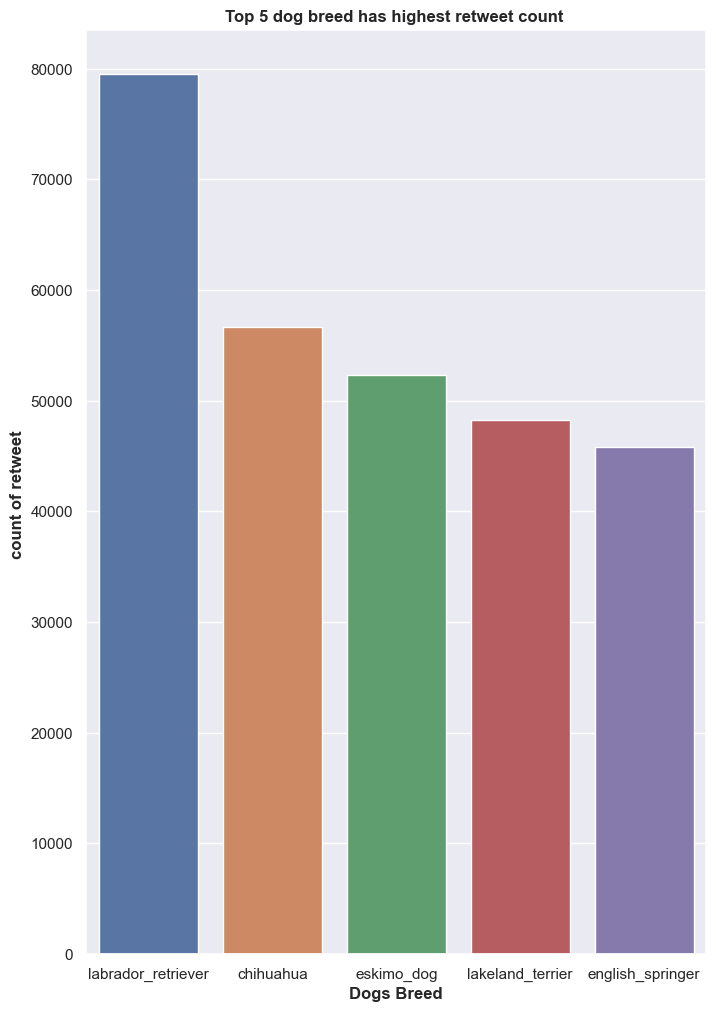

In [102]:
# using bar chart to represent results
sns.barplot(x='p1', y= 'retweet_count', data=qu_1,)
plt.xlabel("Dogs Breed", weight="bold");
plt.ylabel("count of retweet ", weight="bold");
sns.set(rc={'figure.figsize':(8,12)})
plt.title("Top 5 dog breed has highest retweet count ",fontsize =12, weight="bold");

### Insights:
>The Labrador_retriver gathered the highest retweets, with 79,515 retweets

### 2. which is the dog breed with the largest count of tweet?

In [103]:
# We are going to create a dataframe with dog breed and their counts.
qu_2= pd.DataFrame(all_tables['p1'].value_counts().head(5))
qu_2.rename(columns = {"p1" : "count of tweet"}, inplace = True)
qu_2['p1'] = qu_2.index
qu_2.reset_index(drop= True, inplace= True)
qu_2

count of tweet                  p1
0             137    golden_retriever
1              94  labrador_retriever
2              88            pembroke
3              78           chihuahua
4              54                 pug

### Visualization

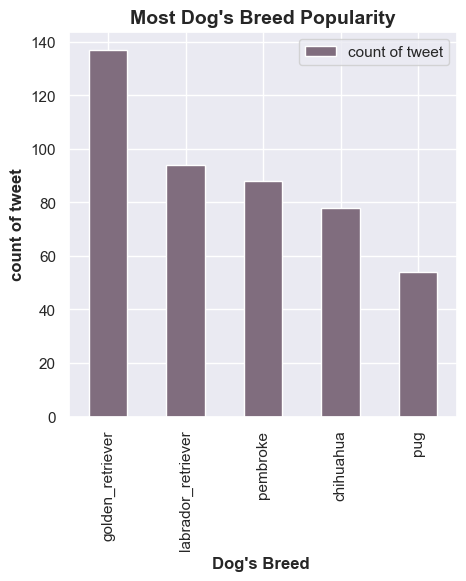

In [104]:
# plot the top 5 dog breed that have the largest count of tweet
qu_2 = qu_2.iloc[:5]
qu_2.plot(kind = 'bar' ,x ='p1', y ='count of tweet', figsize=(5,5), color="#806D7E");
plt.xlabel("Dog's Breed ", weight="bold");
plt.ylabel("count of tweet", weight="bold");
plt.title("Most Dog's Breed Popularity",fontsize =14, fontweight="bold");

### Insights:
>golden_retriever the most dog breed count

### 3. What is the most used source for tweeting?

In [106]:
qu_3= pd.DataFrame(all_tables['source'].value_counts().head())
qu_3

source
Twitter for iPhone     1964
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11

 ### Insights:
**Note:** After we fixed the Tidiness issue source column, we got a clear analysis here
 >Iphone device was the most used twitter source

### 4. Is there a correlation between Favorite and Retweet ?

In [107]:
qu_4 = all_tables[['favorite_count', 'retweet_count']]
qu_4.corr()

favorite_count  retweet_count
favorite_count        1.000000       0.911201
retweet_count         0.911201       1.000000

### Visualization

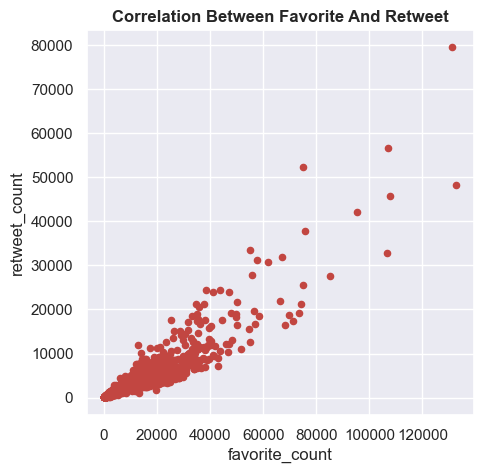

In [108]:
# Correlation between retweet and favorite
all_tables.plot(kind = 'scatter' ,x ='favorite_count', y ='retweet_count', color= "#C24641", figsize=(5,5));
plt.title("Correlation Between Favorite And Retweet",fontsize =12, fontweight="bold");

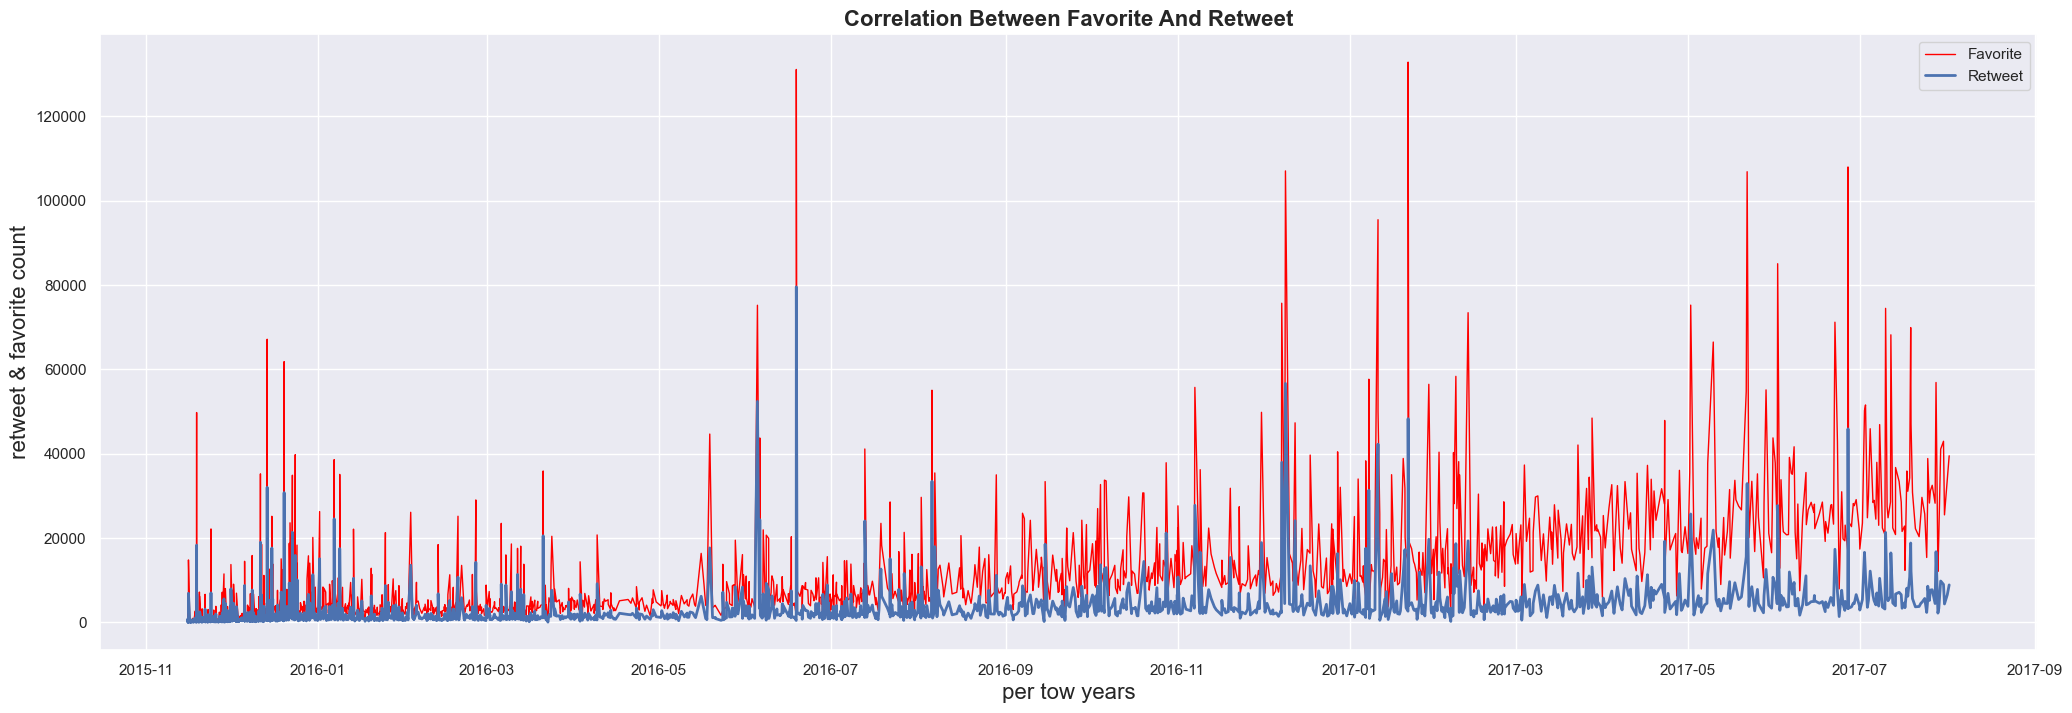

In [109]:
plt.figure(figsize=(25,8))

x = all_tables.timestamp
y = tw_archive_master.retweet_count
z = tw_archive_master.favorite_count
plt.plot(x, z, linewidth=1.0, color="red", label= 'Favorite')
plt.plot(x, y, linewidth=2.0, label='Retweet')


plt.title('Correlation Between Favorite And Retweet', fontsize =16, fontweight="bold")
plt.xlabel('per tow years', fontsize =16)
plt.ylabel('retweet & favorite count', fontsize =16)
plt.legend()
plt.show()

### Insights:
>There seems to be a positive correlation between etweets and favourites, . An increase in one means an increase in the other. 

<br> **Note:** timestamp datatype was object. Before cleaning we can't have this visualization

### Ref: 
>* https://www.programiz.com/python-programming/json
>* https://twitter.com/dog_rates
>* https://stackoverflow.com/questions/33120584/python-regex-find-string-between-html-tags
>* https://softhints.com/python-pandas-extract-url-date-regex/
>* https://www.datacamp.com/tutorial/pandas-apply
>* https://www.adamsmith.haus/python/answers/how-to-display-the-full-text-of-a-pandas-dataframe-in-python
>* https://medium.com/game-of-data/12-things-to-know-about-jupyter-notebook-markdown-3f6cef811707
